In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('/Users/veronikabelikova/Desktop/facebook_ads_data (2.0).csv')
df.head()

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ad_date            1494 non-null   datetime64[ns]
 1   campaign_name      1494 non-null   object        
 2   total_spend        1494 non-null   float64       
 3   total_impressions  1494 non-null   int64         
 4   total_clicks       1494 non-null   int64         
 5   total_value        1494 non-null   float64       
 6   cpc                1443 non-null   float64       
 7   cpm                1462 non-null   float64       
 8   ctr                1462 non-null   float64       
 9   romi               1462 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 116.8+ KB


In [276]:
df['ad_date'] = pd.to_datetime(df['ad_date'], errors='coerce')

df_2021 = df[df['ad_date'].dt.year == 2021].copy()
if df_2021.empty:
    raise ValueError("Немає рядків за 2021 рік.Перевірте дані")

df_2021['total_spend'] = df_2021['total_spend'].fillna(0).round(2)
df_2021['romi'] = df_2021['romi'].fillna(0)
df_2021.head()

df_2021 = df_2021.sort_values(by='ad_date', ascending=True)
df_2021.head(10)

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
1440,2021-01-01,Discounts,0.00,0,0,0.00,NaN,NaN,NaN,0.000000
1439,2021-01-01,Brand,0.39,353,0,0.59,NaN,1.10,0.000000,1.512821
1438,2021-01-02,Discounts,7.74,10709,205,6.90,0.04,0.72,0.019143,0.891473
1437,2021-01-04,Discounts,70.06,22440,1256,68.47,0.06,3.12,0.055971,0.977305
1436,2021-01-05,Discounts,81.15,60232,1379,61.68,0.06,1.35,0.022895,0.760074
1435,2021-01-06,Discounts,142.70,65144,431,145.90,0.33,2.19,0.006616,1.022425
1434,2021-01-06,Brand,0.07,121,0,0.07,NaN,0.58,0.000000,1.000000
1433,2021-01-07,Discounts,116.37,53143,1480,178.20,0.08,2.19,0.027849,1.531323
1432,2021-01-07,Brand,3.05,2742,0,4.74,NaN,1.11,0.000000,1.554098
1431,2021-01-08,Discounts,61.01,32489,2639,83.64,0.02,1.88,0.081227,1.370923


In [284]:
grouped_by_date = (
    df_2021
    .groupby(df_2021['ad_date'])
    .agg(
        total_spend=('total_spend', 'sum'),
        total_value=('total_value','sum')
    )
    .reset_index()
)
grouped_by_date['romi'] = grouped_by_date['total_value']/grouped_by_date['total_spend']
grouped_by_date.head(5)


,ad_date,total_spend,total_value,romi
0,2021-01-01,0.39,0.59,1.512821
1,2021-01-02,7.74,6.90,0.891473
2,2021-01-04,70.06,68.47,0.977305
3,2021-01-05,81.15,61.68,0.760074
4,2021-01-06,142.77,145.97,1.022414


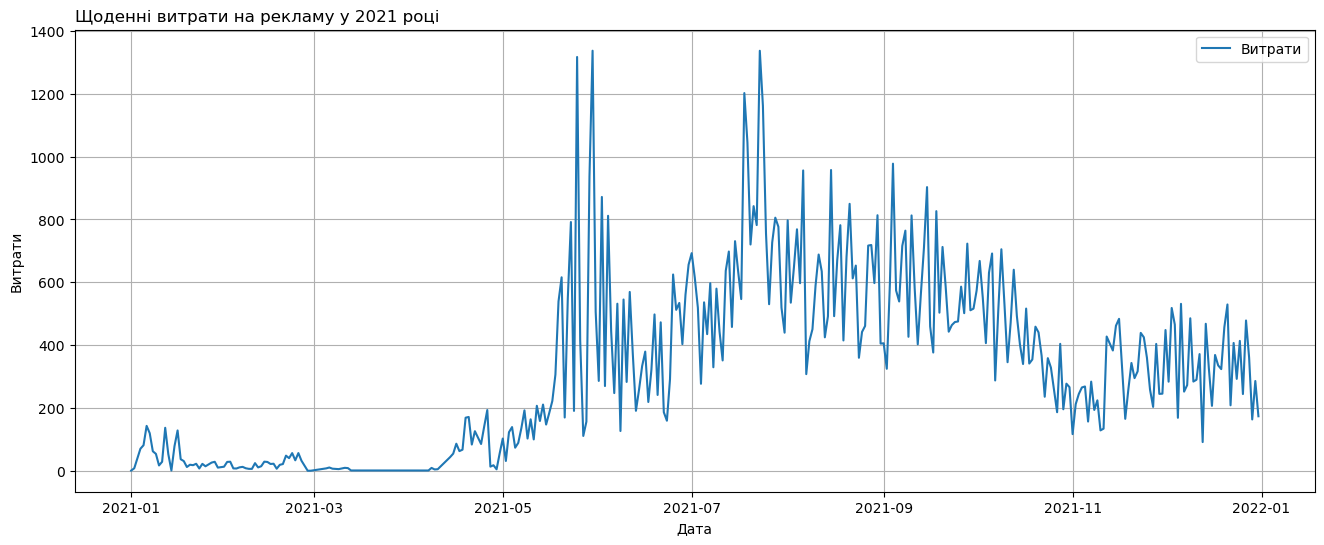

In [286]:
plt.figure(figsize=(16,6))
plt.plot(grouped_by_date['ad_date'],grouped_by_date['total_spend'], label='Витрати')
plt.title('Щоденні витрати на рекламу у 2021 році', loc='left')
plt.xlabel('Дата')
plt.ylabel('Витрати')
plt.grid(True)
plt.legend()
plt.show()

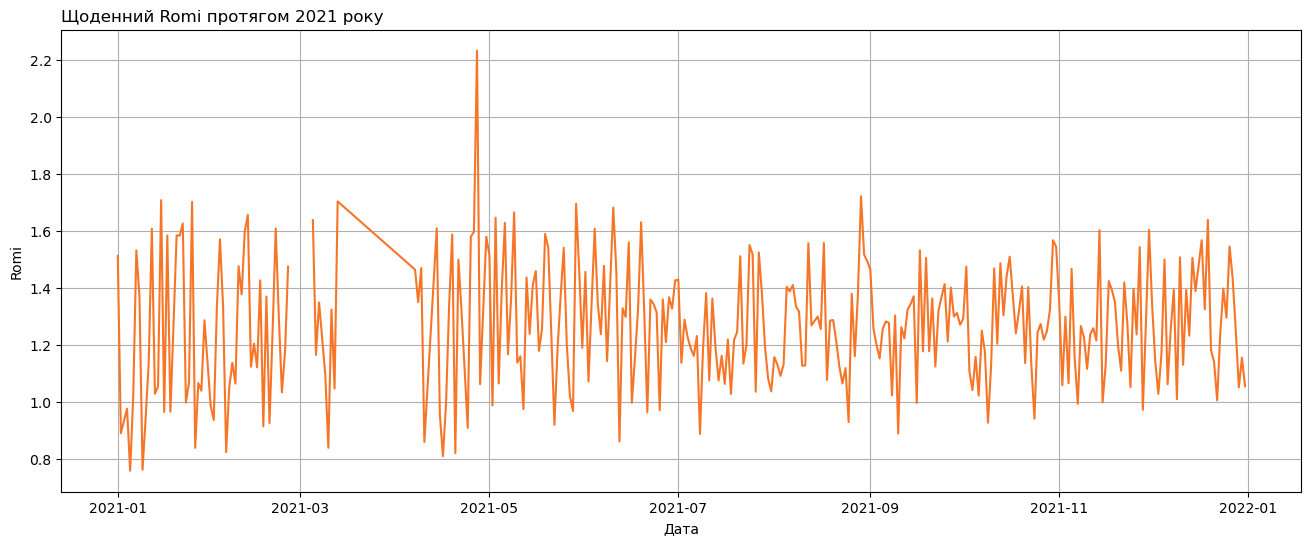

In [285]:
plt.figure(figsize=(16,6))
plt.plot(grouped_by_date['ad_date'],grouped_by_date['romi'], label='Romi', color = '#f77527')
plt.title('Щоденний Romi протягом 2021 року', loc='left')
plt.xlabel('Дата')
plt.ylabel('Romi')
plt.grid(True)
plt.show()

In [291]:
grouped_by_campaign = (
        df_2021
        .groupby('campaign_name')
        .agg(
        company_spend=('total_spend', 'sum'),
        company_value=('total_value','sum')
        )
        .reset_index()
)
grouped_by_campaign['romi'] = grouped_by_campaign['company_value']/grouped_by_campaign['company_spend']

grouped_by_campaign.head(5)

,campaign_name,company_spend,company_value,romi
0,Brand,421.64,518.67,1.230125
1,Crazy discounts,2175.29,2583.59,1.187699
2,Discounts,1791.22,2196.60,1.226315
3,Electronics,23920.42,29169.38,1.219434
4,Lookalike,63631.09,80234.70,1.260935


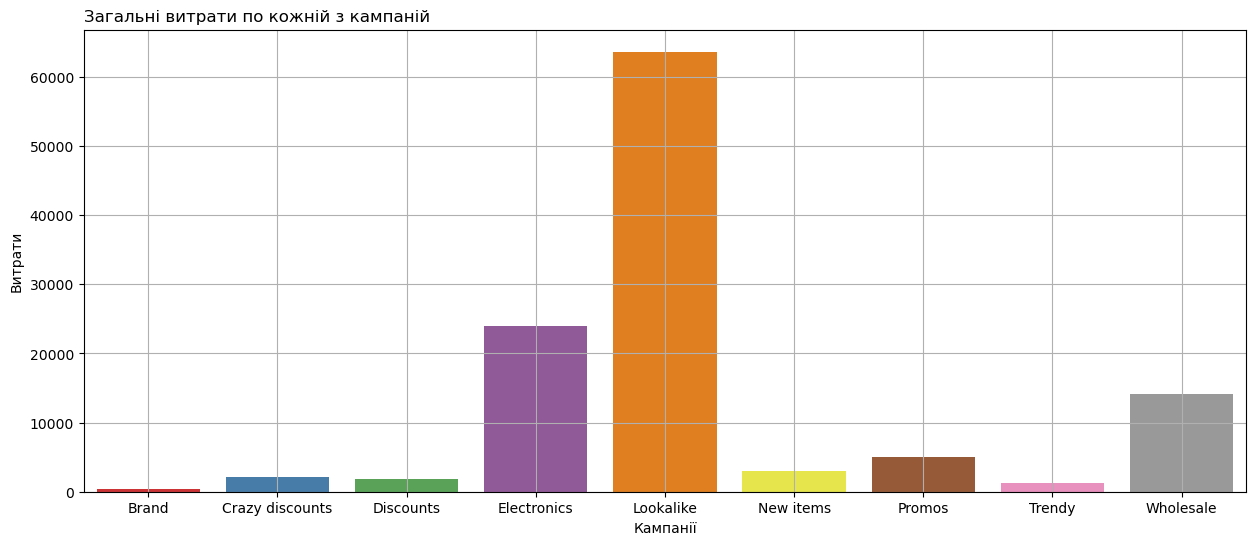

In [215]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'campaign_name', y = 'company_spend', hue = 'campaign_name', palette='Set1', data=grouped_by_campaign)
plt.title('Загальні витрати по кожній з кампаній', loc='left')
plt.xlabel('Кампанії')
plt.ylabel('Витрати')
plt.grid(True)
plt.show()

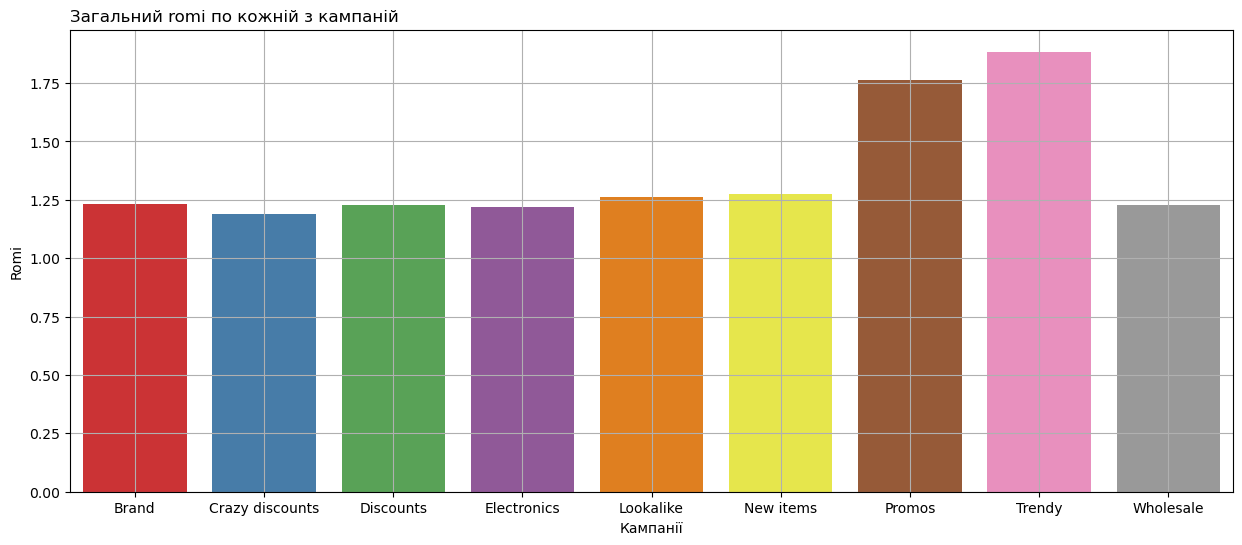

In [295]:
plt.figure(figsize=(15,6))
sns.barplot(x='campaign_name', y = 'romi',hue='campaign_name', palette='Set1', data=grouped_by_campaign)
plt.title('Загальний romi по кожній з кампаній', loc='left')
plt.xlabel('Кампанії')
plt.ylabel('Romi')
plt.grid(True)
plt.show()

<Axes: xlabel='campaign_name', ylabel='romi'>

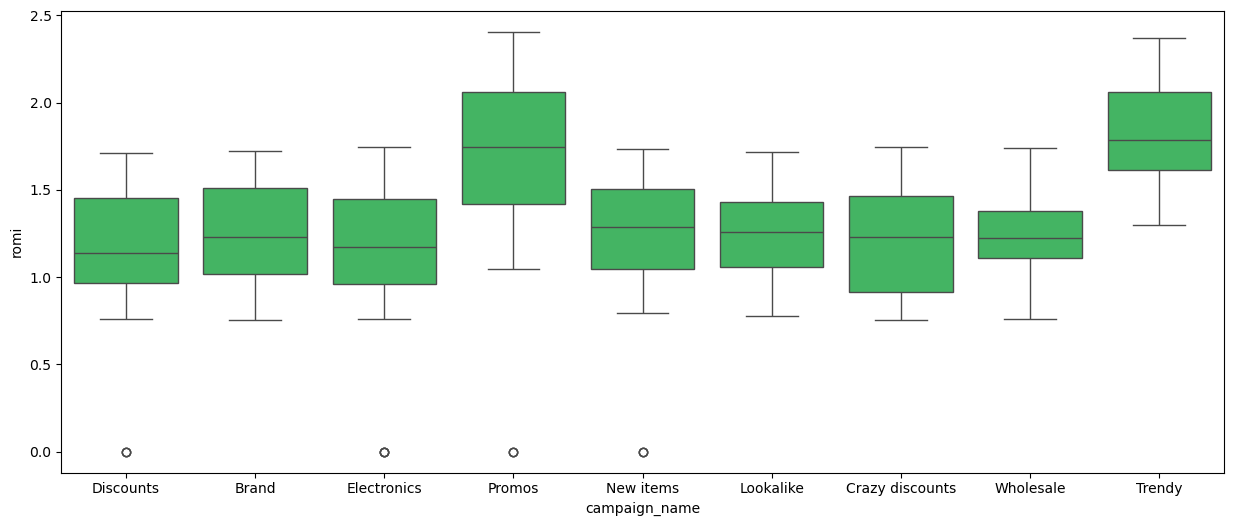

In [289]:
plt.figure(figsize=(15,6))
sns.boxplot(data = df_2021, x='campaign_name', y='romi', color = '#31c75b')

<Axes: xlabel='romi', ylabel='Count'>

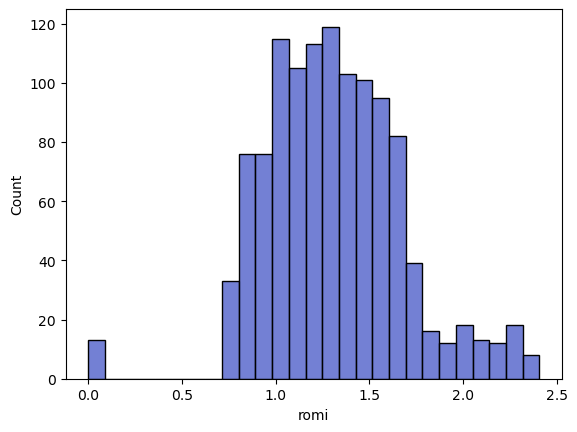

In [280]:
sns.histplot(df_2021,x='romi', color = '#4456c6')

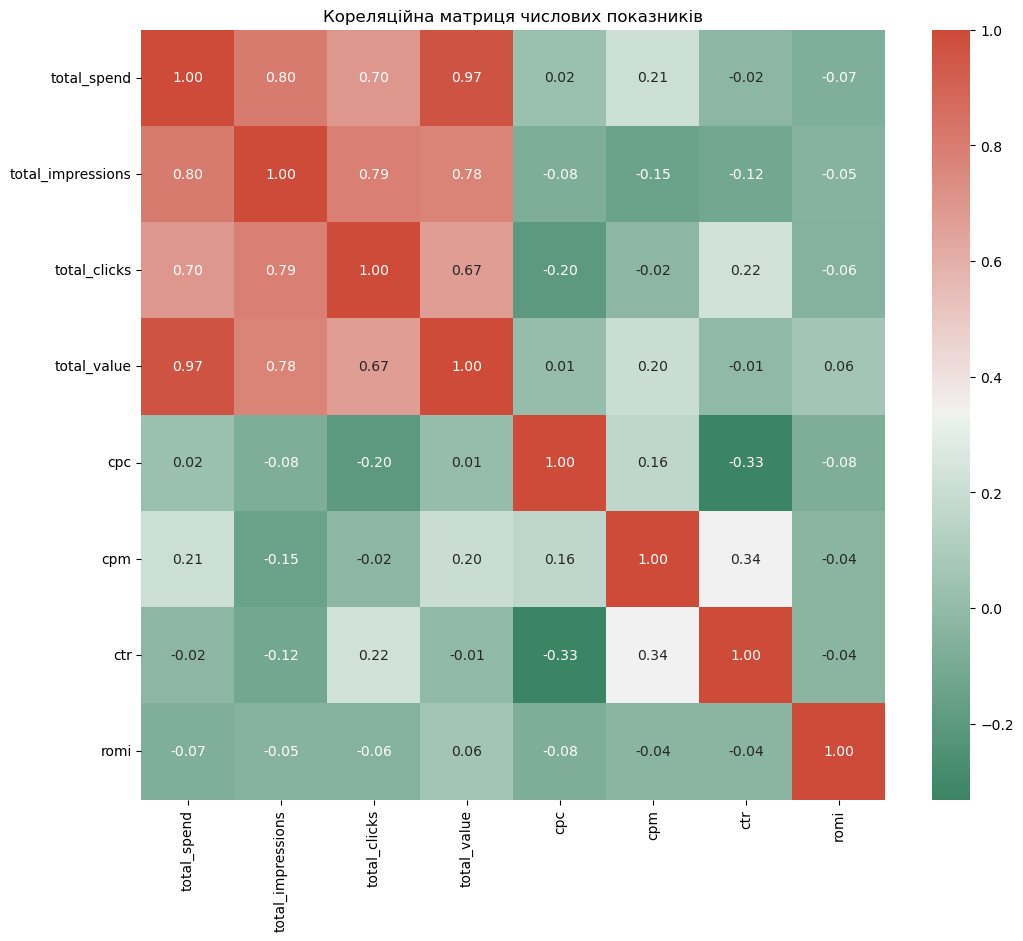

In [281]:
cmap_pastel = sns.diverging_palette(150, 16, as_cmap=True)
corr_matrix = df_2021.corr(numeric_only=True)
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_matrix,
    annot=True,      
    fmt=".2f",       
    cmap = cmap_pastel  
)
plt.title("Кореляційна матриця числових показників")
plt.show()

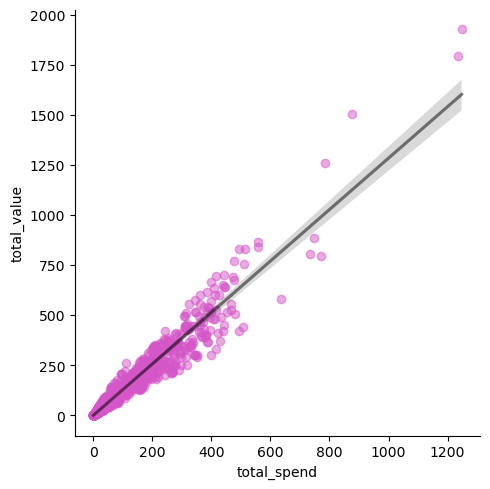

In [282]:
sns.lmplot(df_2021, x='total_spend', y = 'total_value', 
    scatter_kws={'color':'#d456c7','alpha':0.5},
    line_kws={'color':'black', 'alpha':0.5})